In [1]:
# Aula 04 - Data Visualization
import pandas as pd # biblioteca para fazer a leitura do arquivo csv
import matplotlib.pyplot as plt  # biblioteca para plotar os gráficos
import matplotlib.dates as mdates # biblioteca para formatar as datas

In [2]:
# cria a variavel para armazenar o dataframe
df= pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv')

In [3]:
# Exibe as 4 primeiras linhas
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [4]:
df.tail() # exibe as 4 ultimas linhas 

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
45248,282.00,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.89,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.39,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.02,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00
45252,282.28,1029.0,76.0,340.0,1.0,Quarta,2017-11-30 00:00:00


In [5]:
df.info() # verificando os tipos de dados de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [6]:
# Fazendo a conversão de dados do tipo object para datetime
import datetime # biblioteca  para converter object para datetime
df['data'] = pd.to_datetime(df['data']) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


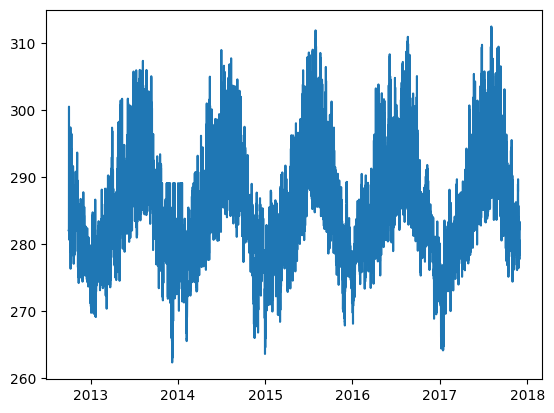

In [8]:
# plotando o gráfico  da temperatura

plt.plot(df['data'],df['temperatura']) # plota o gráfico temperatura x data

C:\Users\sn1076220\AppData\Local\Temp\ipykernel_124244\2508352166.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  eixo.legend() # exibe a legenda


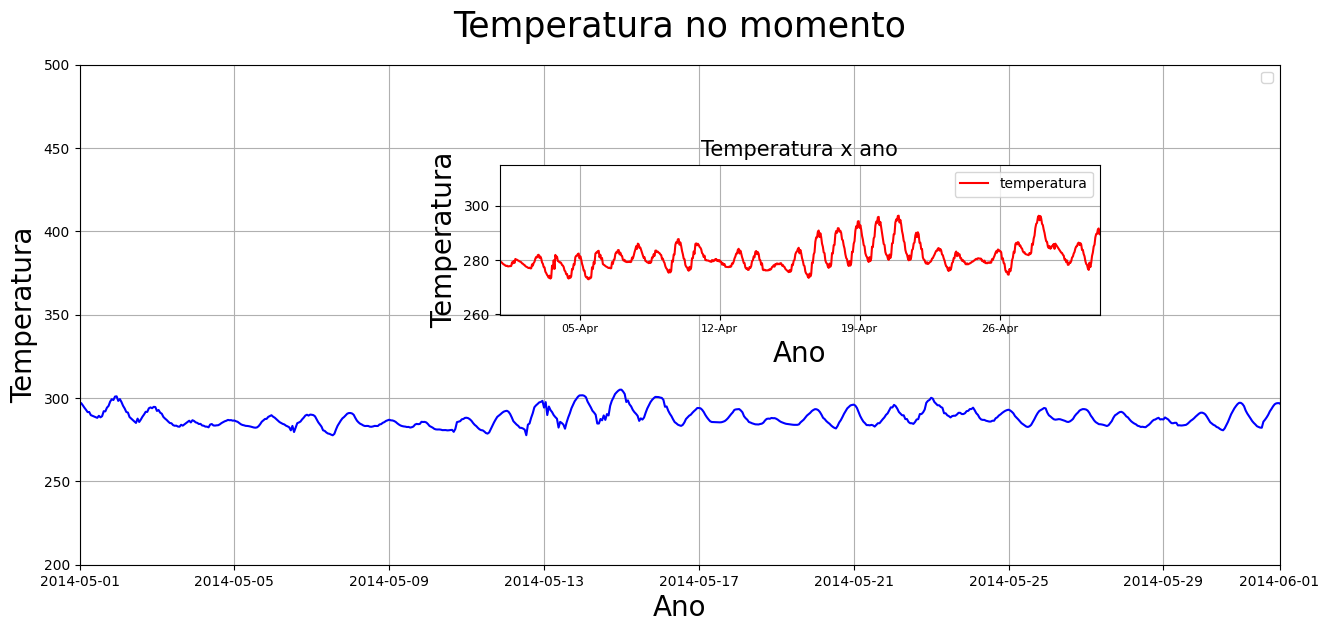

In [16]:
# Criando código para plotar um gráfico dentro do outro
fig = plt.figure(figsize=(12,5)) # Cria variavel para armazenar o tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # Cria os eixos da figura
eixo.set_ylim(200,500) # define o limite do eixo y
eixo.plot(df['data'],df['temperatura'],color='b')
# definindo o período da base de dados para plotar o gráfico
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1)) 
eixo.set_title('Temperatura no momento',fontsize=25,pad=20) # titulo do grafico
eixo.set_xlabel('Ano',fontsize=20)
eixo.set_ylabel('Temperatura',fontsize=20)
eixo.grid(True)
eixo.legend() # exibe a legenda

# criando eixo 2 dentro do gráfico
eixo2 = fig.add_axes([0.35,0.50,0.5,0.3]) 
# definindo o espaçamento do tick para cada 7 dias
eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7)) # definindo o intervalo para o eixo x
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b')) # formatação para o mes e o dia
#definindo o período da base de dados
eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1)) 
eixo2.tick_params(axis='x',labelsize=8) # espaçamento do eixo x
eixo2.plot(df['data'],df['temperatura'],color='r')
eixo2.grid(True) # ativa a grade do gráfico
eixo2.set_title('Temperatura x ano',fontsize=15) # titulo do gráfico
eixo2.set_ylabel('Temperatura',fontsize=20) # titulo do eixo y
eixo2.set_xlabel('Ano',fontsize=20) # titulo do eixo x
eixo2.legend(['temperatura'],loc='best',fontsize=10) # ativa a legenda do gráfico